## The operations we need: 

In [1]:
function nabla(f, x::Float64, delta::Float64)

  ## differentiation of holomorphic functions in a single complex variable applied 
  ## to real-valued functions in a single variable using the Cauchy Integral Formula

  ## f:= the function to be differentiated
  ## x:= where the derivative is evaluated
  ## delta:= the sampling frequency

  N = round(Int,2*pi/delta)
  thetas = vcat(1:N)*delta

  ## collect arguments and rotations: 
  rotations = map(theta -> exp(-im*theta),thetas)
  arguments = x .+ conj.(rotations)  

  ## calculate expectation: 
  expectation = 1.0/N*real(sum(map(f,arguments).*rotations))

  return expectation

end

function partial_nabla(f, i::Int64, X::Array{Float64,1},delta::Float64)

  ## partial differentiation of holomorphic functions in a single complex variable applied 
  ## to real-valued functions in a single variable using the Cauchy Integral Formula

  ## f:= the function to be differentiated
  ## i:= partial differentiation with respect to this index
  ## X:= where the partial derivative is evaluated
  ## delta:= the sampling frequency

  N = length(X)

  kd(i,n) = [j==i for j in 1:n]

  f_i = x -> f(x*kd(i,N) .+ X.*(ones(N)-kd(i,N)))

  return nabla(f_i,X[i],delta)

end

partial_nabla (generic function with 1 method)

## 1. Simulating a one-dimensional hookean spring: 

In [2]:
N = 100

# The Lagrangian for a hookean spring:
M, K = 1.0, 1.0

T(X) = 0.5*M*(X[2]^2)
V(X) = 0.5*K*X[1]^2

L(X) = T(X)-V(X)

##  The position and velocity variables will be stored in this array:
Z = zeros(100,2)

## The initial conditions: 
Z[1,:] = [0.5,1.0]

2-element Array{Float64,1}:
 0.5
 1.0

In [3]:
delta = (2*pi)/1000

dt = 0.1

## simulate the pendulum system: 
for i=1:N-1

	## update position: 
	Z[i+1,1] = Z[i,1] + Z[i,2]*dt + 0.5*(partial_nabla(L,1,Z[i,:],delta))*dt^2

	## update velocity:
	Z[i+1,2] = Z[i,2] + 0.5*(partial_nabla(L,1,Z[i,:],delta)+partial_nabla(L,1,Z[i+1,:],delta))*dt

end

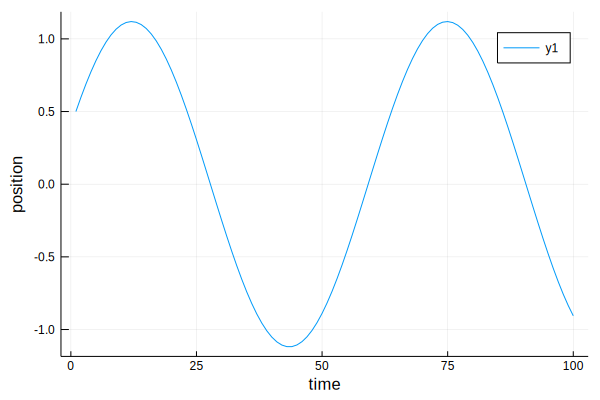

In [4]:
using Plots

## plotting position against time: 
plot(1:100,Z[:,1])

xlabel!("time")
ylabel!("position")

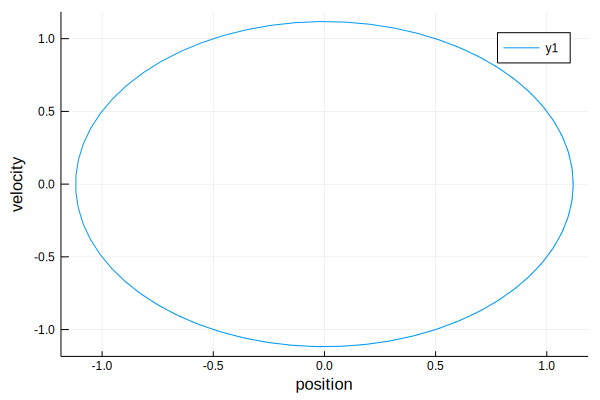

In [5]:
## plotting velocity against position: 
plot(Z[:,1],Z[:,2])

xlabel!("position")
ylabel!("velocity")

## 2. Simulating a simple pendulum: 

In [6]:
## Number of samples: 
N = 300

# The Lagrangian for a simple pendulum:
M, l = 1.0, 2.0

T(X) = 0.5*(l*X[2])^2
V(X) = -M*9.8*l*cos(X[1])

L(X) = T(X)-V(X)

##  The position and velocity variables will be stored in this array:
Z = zeros(N,2)

## The initial conditions: 
Z[1,:] = [pi/4,1.0];

In [7]:
delta = (2*pi)/1000

dt = 0.01

## simulate the pendulum system: 
for i=1:N-1

	## update angle coordinate: 
	Z[i+1,1] = Z[i,1] + Z[i,2]*dt + 0.5*(partial_nabla(L,1,Z[i,:],delta))*dt^2

	## update angular velocity:
	Z[i+1,2] = Z[i,2] + 0.5*(partial_nabla(L,1,Z[i,:],delta)+partial_nabla(L,1,Z[i+1,:],delta))*dt

end

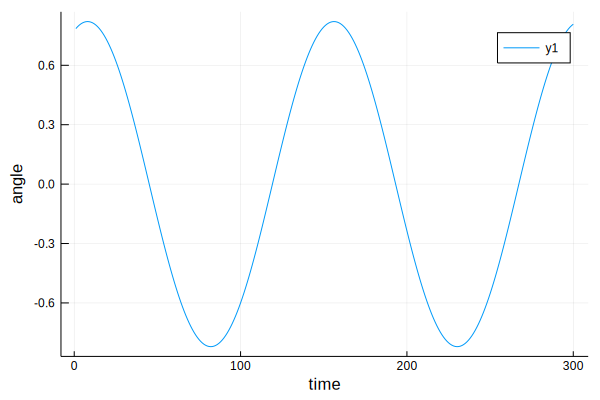

In [8]:
using Plots

## plotting angle against position: 
plot(1:N,Z[:,1])

xlabel!("time")
ylabel!("angle")

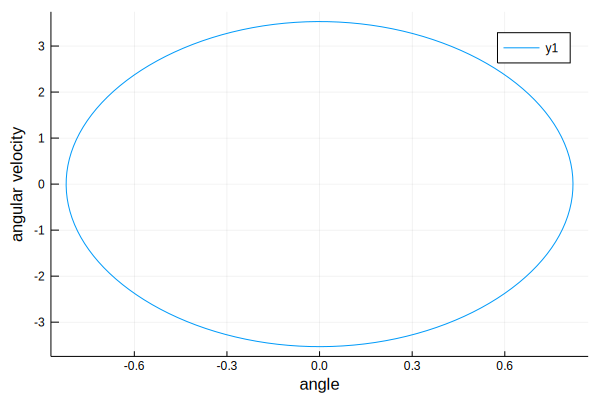

In [9]:
## plotting angular velocity against angle: 
plot(Z[:,1],Z[:,2])

xlabel!("angle")
ylabel!("angular velocity")

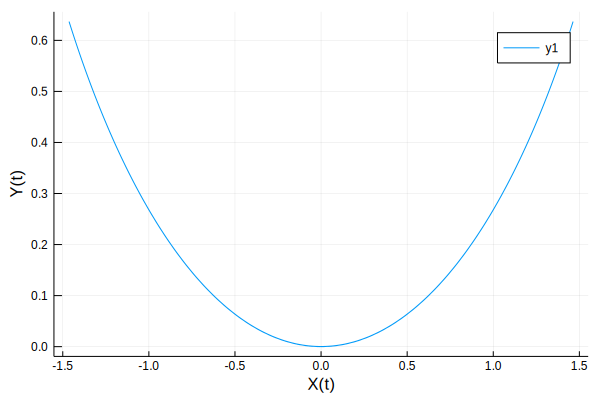

In [10]:
## plotting Y vs X: 
plot(l*sin.(Z[:,1]),l*(1 .-cos.(Z[:,1])))

xlabel!("X(t)")
ylabel!("Y(t)")

## 3. Simulating a spring pendulum:  

In [11]:
N = 2000

## the Lagrangian for the spring pendulum: 
M, l, K = 1.0, 1.0, 5.0

T(X) = 0.5*M*X[3]^2+0.5*M*((l+X[1])*X[3])^2
V(X) = 0.5*K*X[1]^2-M*9.8*(l+X[1])*cos(X[2])    

L(X) = T(X)-V(X)

##  All four variables will be stored in this array:
Z = zeros(N,4)

## The initial conditions: 
Z[1,:] = [1.0,pi/2,0.0,0.0];

In [12]:
delta = (2*pi)/1000

dt = 0.001

## simulate the pendulum system: 
for i=1:N-1

	## update x: 
    Z[i+1,1] = Z[i,1] + Z[i,3]*dt + 0.5*(1/M)*partial_nabla(L,1,Z[i,:],delta)*dt^2
    
    ## update theta: 
    Z[i+1,2] = Z[i,2] + Z[i,4]*dt + 0.5*(1/M)*partial_nabla(L,2,Z[i,:],delta)*dt^2
    
    ## update d_x:
    Z[i+1,3] = Z[i,3] + 0.5*(1/M)*(partial_nabla(L,1,Z[i,:],delta)+partial_nabla(L,1,Z[i+1,:],delta))*dt
    
    ## update d_theta:
    Z[i+1,4] = Z[i,4] + 0.5*(1/M)*(partial_nabla(L,2,Z[i,:],delta)+partial_nabla(L,2,Z[i+1,:],delta))*dt

end

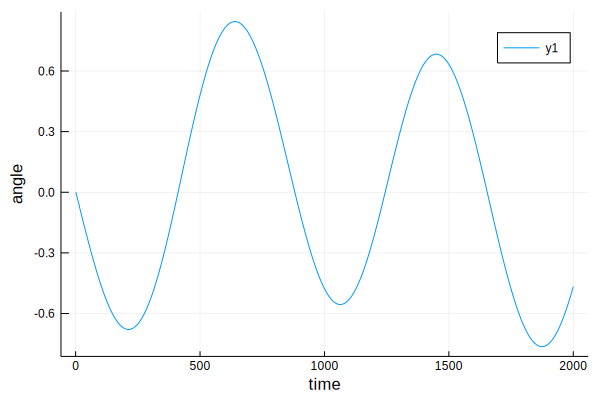

In [13]:
using Plots

## plotting angle against time: 
plot(1:N,Z[:,3])

xlabel!("time")
ylabel!("angle")

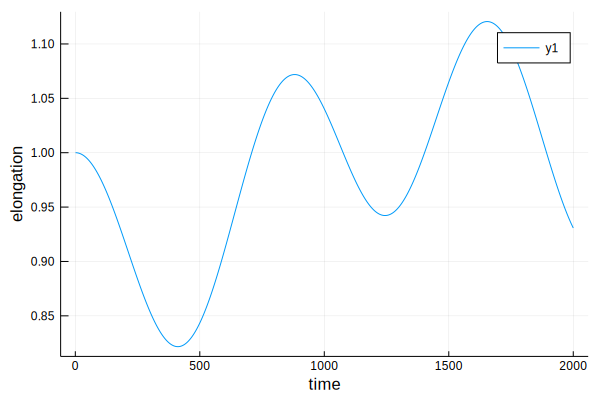

In [14]:
using Plots

## plotting elongation over time: 
plot(1:N,Z[:,1])

xlabel!("time")
ylabel!("elongation")

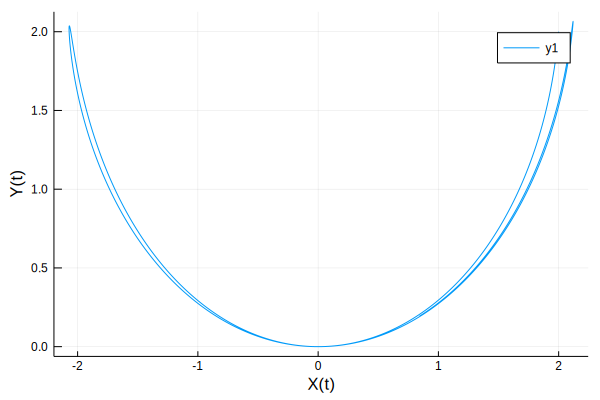

In [15]:
using Plots

## plotting Y vs X: 
plot((l .+ Z[:,1]).*sin.(Z[:,2]),(l .+ Z[:,1]).*(1 .-cos.(Z[:,2])))

xlabel!("X(t)")
ylabel!("Y(t)")

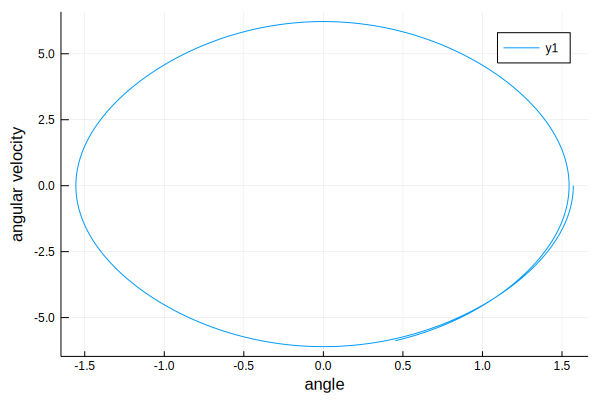

In [16]:
## plotting angular velocity against angle: 
plot(Z[:,2],Z[:,4])

xlabel!("angle")
ylabel!("angular velocity")